(410, 8)


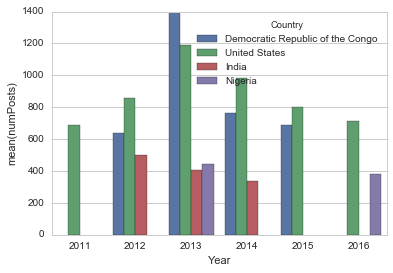

In [178]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

df1 = pd.read_csv("//Users//dineshmurali//Documents//wpcommunitydata//wpCommunity_1.csv")
df2 = pd.read_csv("//Users//dineshmurali//Documents//wpcommunitydata//wpCommunity_2.csv")
df3 = pd.read_csv("//Users//dineshmurali//Documents//wpcommunitydata//wpCommunity_3.csv")
df4 = pd.read_csv("//Users//dineshmurali//Documents//wpcommunitydata//wpCommunity_4.csv")
df5 = pd.read_csv("//Users//dineshmurali//Documents//wpcommunitydata//wpCommunity_5.csv")

frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)

df['Date'] = np.where(df['Date'] == "Today", date.today().strftime("%B %d, %Y"), df['Date'])
df['Date'] = np.where(df['Date'] == "Yesterday", 
                      (date.today() - timedelta(1)).strftime("%B %d, %Y"), 
                      df['Date'])
df['Date'] = df['Date'].fillna(value = "January 01, 1900")
df['Date'] = np.where(df.Date.str[-4:].str.isnumeric(), 
                      df['Date'], 
                      df['Date'] + ', ' + str(datetime.datetime.today().year))
df['Country'] = df['Country'].fillna(value = 'Unknown')
df['Date'] = pd.to_datetime(df.Date, format = "%B %d, %Y")
df['YrMo'] = pd.DatetimeIndex(df.Date).strftime("%B%Y")
df['Year'] = pd.DatetimeIndex(df.Date).year

#posts trend, esp from US
#plot top 10 contributors
#countries posts vs encouragement and love
#encouragements by time and language

#print(df1.shape)
#df[df['UserName'] == 'Diane DeVillers']
#print(df.groupby('Year').size().sort_values(ascending = False))
#print(df.groupby(['Year','Country']).size().sort_values(ascending = False))
#print(df.groupby('UserName').size().sort_values(ascending = False))
#print(df.groupby('UserName').sum().sort_values(by='Loves',ascending = False))
#print(df.groupby('UserName').sum().sort_values(by='Encourages',ascending = False))
#print(df.groupby('Country').sum().sort_values(by='Loves',ascending = False))
#print(df.groupby('Country').sum().sort_values(by='Encourages',ascending = False))
#df[df.Year > 1900].groupby('Year').size().plot(title = "Posts By Year",
#                                               legend = False)

#df.groupby('Country').size().sort_values(ascending = False)[:10].plot(
#    title = "Posts By Country", legend = False, kind = "pie")

#df[(df.Country == "United States") & (df.Year > 1900)].groupby('UserName').size().sort_values(ascending = False)[:10].plot(title = "Posts By User For US", legend = False, kind = "bar")

#df[(df.UserName == "Diane DeVillers")].groupby('Year').size().plot(
#    title = "Posts By Diane", legend = False)

#df[(df.UserName == "Diane DeVillers") & (df.Year > 1900)].groupby("Year").size()

byYearCountry = pd.DataFrame(df[df.Year > 1900].groupby(['Year','Country']).size().sort_values(
        ascending = False), columns = ['numPosts'])
byYearCountry = byYearCountry.reset_index(level = ['Year','Country'])
byYearCountry = byYearCountry.sort_values(by = ["Year", "numPosts"], ascending = [True, False])
byYearCountryTopN = byYearCountry.groupby("Year").head(3).reset_index(drop = True)

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
axis = sns.barplot(x="Year", y="numPosts", hue="Country", data = byYearCountryTopN)
axis.set(xlabel = "Year", ylabel = "Num Posts", title = "Top 3 Posts By Country")


plt.show()

,Year,Country,UserName,Encourages,Loves
0,2004,United States,Jensine Larsen,0,0
1,2005,United States,Jensine Larsen,0,0
2,2007,United States,Maria Jett,65,0
3,2007,United States,Eugene Frank,58,0
4,2007,United States,Goldie Davich,41,0
5,2007,Kenya,Auma,33,0
6,2007,Democratic Republic of the Congo,Chingwell Mutombu,15,0
7,2007,Tanzania,Rosemary Olive Mbone Enie,10,0
8,2007,Canada,Khairunnisa Mohamedali,8,0
9,2007,India,Ramya,8,0


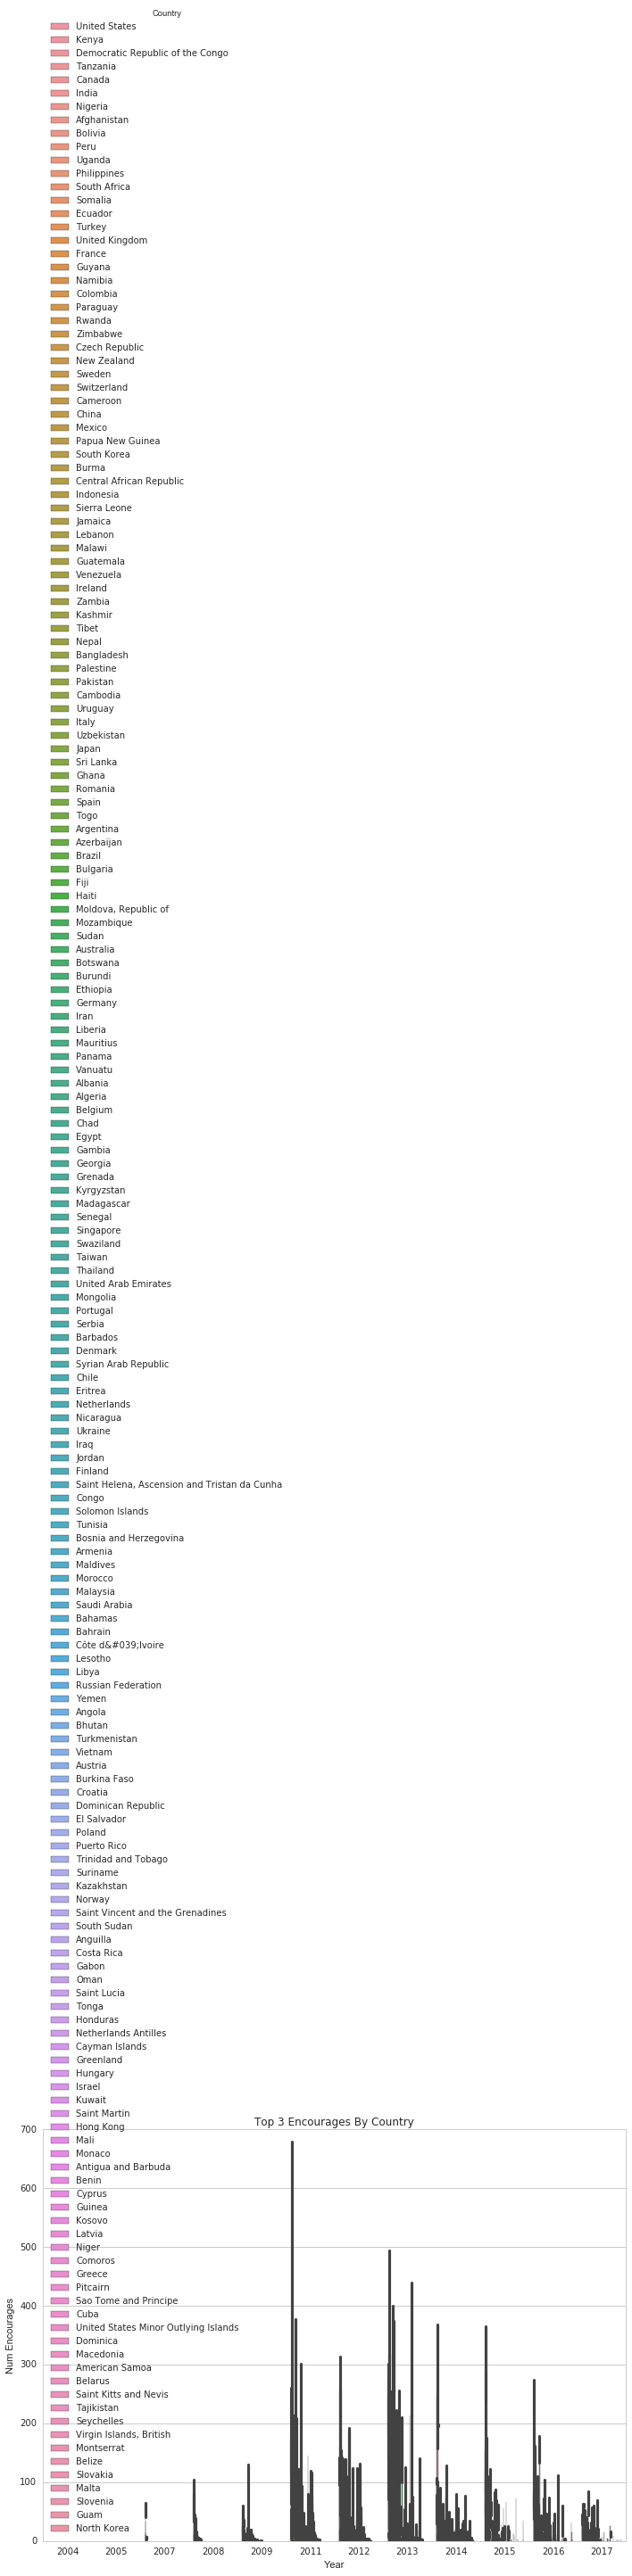

In [191]:
byYrCtyUName = pd.DataFrame(df[df.Year > 1900].groupby(['Year','Country','UserName']).sum())
byYrCtyUName = byYrCtyUName.reset_index(level = ['Year', 'Country', 'UserName'])
byYrCtyUName = byYrCtyUName.sort_values(by = ["Year", "Encourages"], ascending = [True, False])
byYrCtyUNameTopN = byYrCtyUName.groupby(["Year", "Country"]).head(3).reset_index(drop = True)


fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
axis = sns.barplot(x="Year", y="Encourages", hue="Country", data = byYrCtyUNameTopN)
axis.set(xlabel = "Year", ylabel = "Num Encourages", title = "Top 3 Encourages By Country")
byYrCtyUNameTopN

#plt.show()